# Neural Network for Sport - (Gittata-Range)


<img src="https://citynews-sportpiacenza.stgy.ovh/~media/horizontal-hi/32988133555468/norberto-fontana-durante-il-lancio-del-giavellotto-a-grosseto-2.jpg" width="1200">

## Phisic

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/gittata1.png" width=700>






<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/gittata2.jpg" width=1500>


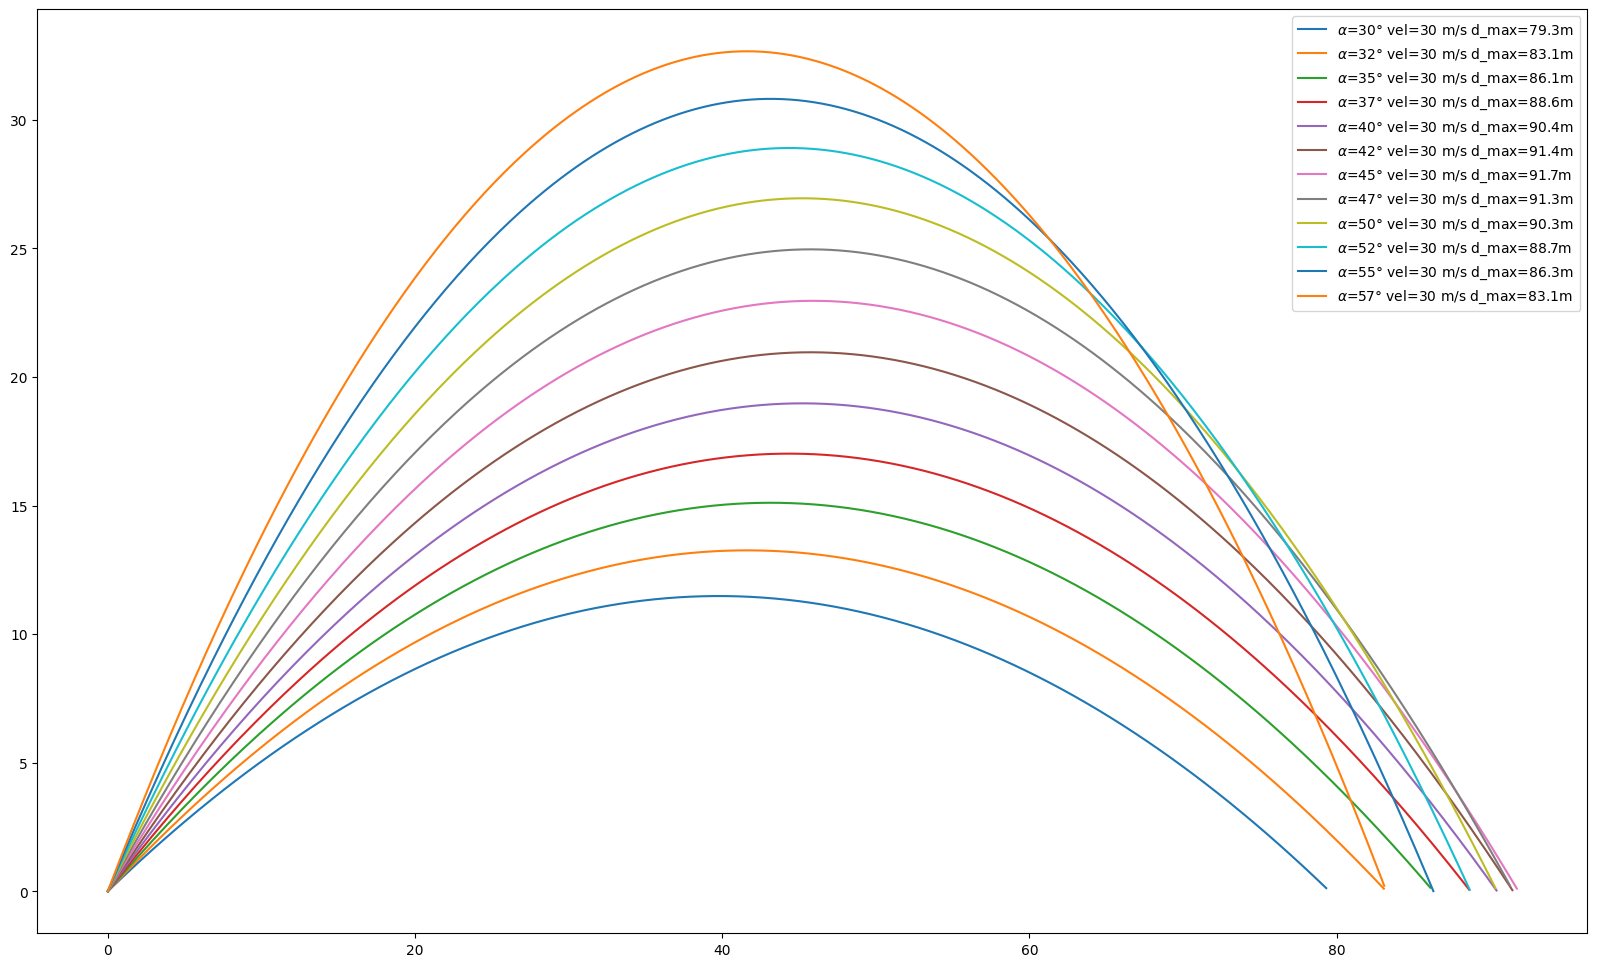

In [1]:
import numpy as np
import matplotlib.pylab as plt

#initialize variables
#velocity, gravity
v = 30 # m/s
g = 9.8 # m/s^2

num_trials = np.pi/72 #12
theta = np.arange(np.pi/6, np.pi/3,num_trials )

tt = np.linspace(0, 10, num=1000) # Set time as 'continous' parameter.

plt.figure(figsize=(20,12))
for a in theta: # Calculate trajectory for every angle
    x1 = []
    y1 = []
    for t in tt:
        x = v*t*np.cos(a) # get positions at every point in time
        y = -0.5*g*t**2 + v*t*np.sin(a)
        x1.append(x)
        y1.append(y)
    ## stop negative part!
    p = [i for i, j in enumerate(y1) if j < 0] # Don't fall through the floor
    for i in sorted(p, reverse = True):
        del x1[i]
        del y1[i]
    ### Plot ###
    angle = a*180/np.pi # conversion in degree
    distance = x1[-1]
    altezza = max(y1)
    plt.plot(x1, y1,
             label=r"$\alpha$"+f"={angle:.0f}° vel={v:.0f} m/s d_max={distance:.1f}m ") #hmax={altezza:.1f}m

plt.legend(loc=1)
plt.show() # And show on one graphic

## Interactive Widgets

In [2]:
def plot_trials(v=30, ang_g=30):
    g = 9.8
    tt = np.linspace(0, 10, num=1000) # Set time as 'continous' parameter.
    ang = ang_g*np.pi/180 #rad
    theta = np.array([ang]) #array rad

    plt.figure(figsize=(15,8))
    for a in theta: # Calculate trajectory for every angle
        x1 = []
        y1 = []
        for t in tt:
            x = v*t*np.cos(a) # get positions at every point in time
            y = -0.5*g*t**2 + v*t*np.sin(a)
            x1.append(x)
            y1.append(y)
        ## stop negative part!
        p = [i for i, j in enumerate(y1) if j < 0] # Don't fall through the floor
        for i in sorted(p, reverse = True):
            del x1[i]
            del y1[i]
        ### Plot ###
        angle = a*180/np.pi # conversion in degree
        distance = x1[-1]
        altezza = max(y1)
        plt.plot(x1, y1,
                label=r"$\alpha$"+f"={angle:.0f}° vel={v:.0f} m/s d_max={distance:.1f}m h_max={altezza:.1f}m ")

    plt.title('Grafico Simulazione Giavellotto')
    plt.xlim(0, distance+50)
    plt.ylim(0, altezza+50)
    plt.ylabel('altezza massima')
    plt.xlabel('distanza massima')
    plt.legend(loc=1)
    plt.show() # And show on one graphic
    print("alpha"+f"={angle:.0f}° speed={v:.0f} m/s d_max={distance:.1f}m h_max={altezza:.1f}m ")

In [3]:
from ipywidgets import interactive

interactive(lambda angle,speed: plot_trials(speed,angle),
                                angle = (30,70,1),
                                speed = (20,70,1)
                                )

interactive(children=(IntSlider(value=50, description='angle', max=70, min=30), IntSlider(value=45, descriptio…

## Create Synthetic Data

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_data_gittata(size=5000):
    g = 9.81
    velocity = np.random.uniform(5, 100, size)
    alpha = np.random.uniform(20,60, size)
    projectile_range = [np.power(velocity,2)*np.sin(np.deg2rad(2*alpha)) / g]
    y = np.reshape(projectile_range, (size, 1))
    return train_test_split(np.vstack([velocity,alpha]).transpose(),y,test_size=0.2,random_state=667)
    #X_train,X_test,y_train,y_test --> output

In [5]:
X_train,X_test,y_train,y_test = generate_data_gittata()
X_train.shape, y_train.shape

#Features [velocity,alpha]
#Target [distance]

((4000, 2), (4000, 1))

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Dense(48, activation="relu", input_dim=2))
model.add(Dense(32, activation="relu"))

model.add(Dense(1))

model.compile(optimizer='adam', loss="mse", metrics=['mae'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                1568      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1745 (6.82 KB)
Trainable params: 1745 (6.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
checkpoint = ModelCheckpoint(filepath="temp.h5",
                             verbose=1,
                             save_best_only=True)

history =model.fit(X_train,y_train,
                    epochs=150,
                    batch_size=10,
                    validation_data=(X_test,y_test),
                    callbacks=[checkpoint]
                    )

Epoch 1/150
389/400 [============================>.] - ETA: 0s - loss: 41338.4648 - mae: 134.2471
Epoch 1: val_loss improved from inf to 7954.83301, saving model to temp.h5
400/400 [==============================] - 3s 3ms/step - loss: 40464.7812 - mae: 132.6747 - val_loss: 7954.8330 - val_mae: 69.1987
Epoch 2/150
 82/400 [=====>........................] - ETA: 0s - loss: 8794.3223 - mae: 73.8723

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


391/400 [============================>.] - ETA: 0s - loss: 8079.8462 - mae: 68.9911
Epoch 2: val_loss improved from 7954.83301 to 7265.43896, saving model to temp.h5
400/400 [==============================] - 1s 2ms/step - loss: 8116.0874 - mae: 69.1851 - val_loss: 7265.4390 - val_mae: 63.3747
Epoch 3/150
398/400 [============================>.] - ETA: 0s - loss: 7502.5015 - mae: 64.0013
Epoch 3: val_loss improved from 7265.43896 to 6889.83691, saving model to temp.h5
400/400 [==============================] - 1s 2ms/step - loss: 7512.9248 - mae: 64.0387 - val_loss: 6889.8369 - val_mae: 59.5977
Epoch 4/150
389/400 [============================>.] - ETA: 0s - loss: 7167.1411 - mae: 61.8171
Epoch 4: val_loss did not improve from 6889.83691
400/400 [==============================] - 1s 3ms/step - loss: 7184.5391 - mae: 61.8801 - val_loss: 6929.4277 - val_mae: 60.0001
Epoch 5/150
400/400 [==============================] - ETA: 0s - loss: 6910.0903 - mae: 60.2345
Epoch 5: val_loss improved 

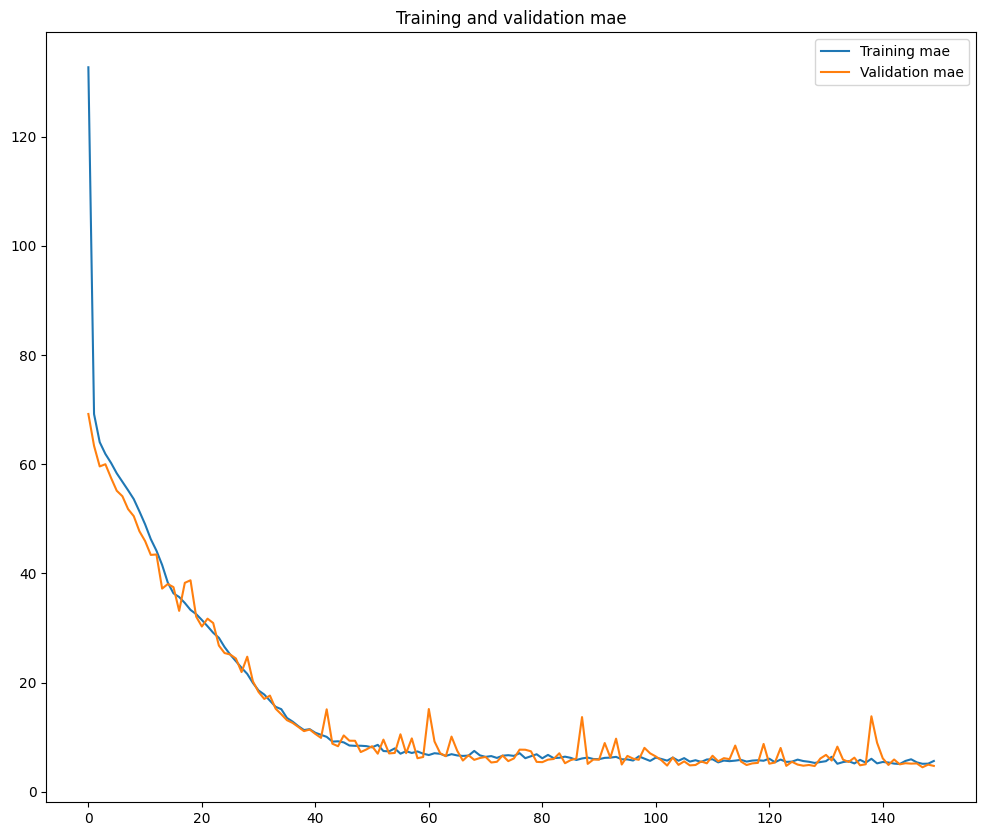

In [9]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

plt.figure(figsize=(12,10))
plt.plot(epochs, mae, label='Training mae')
plt.plot(epochs, val_mae, label='Validation mae')
plt.title('Training and validation mae')
plt.legend()

In [10]:
score = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('Score:', score)

32/32 [==============================] - 0s 1ms/step
Score: [42.05671691894531, 4.766521453857422]


In [11]:
model.save('final_giavellotto.h5')

In [12]:
model= load_model('final_giavellotto.h5')

In [13]:
## input was no normalized

In [14]:
# feature input velocity + angle in grad
res = model.predict([[30,45]]) ## real--> 91.7m
print("final prediction is " f"{res[0][0]:.2f}m")

1/1 [==============================] - 0s 87ms/step
final prediction is 92.31m


In [15]:
def calcola_gittata(V0, alpha):
    g = 9.8
    ang_rad = np.deg2rad(alpha)
    V0x = V0*np.cos(ang_rad)
    V0y = V0*np.sin(ang_rad)
    t_di_volo = 2*V0y/g
    gittata = round((V0x*t_di_volo),1)
    return gittata

In [16]:
# feature input velocity + angle in grad
veloc = int(input("Inserisci la velocità di lancio in m/s \n ")) #50 #m/s
angle = int(input("Inserisci l'angolo di lancio in gradi  \n "))  #30 #degree

dist = calcola_gittata(V0=veloc, alpha=angle)
res = model.predict([[veloc,angle]])
print(f"final prediction of the DL model is {res[0][0]:.1f} m")
print(f"for input speed of {veloc} m/s and an angle {angle}° a total rane of {dist} m")
print("final error is "f"{(res[0][0]-dist)/dist*100:.1f}%")

Inserisci la velocità di lancio in m/s 
 30
Inserisci l'angolo di lancio in gradi  
 45
1/1 [==============================] - 0s 38ms/step
final prediction of the DL model is 92.3 m
for input speed of 30 m/s and an angle 45° a total rane of 91.8 m
final error is 0.6%
